# Alberto Castaneda Arana A01250647
# Spam classifier with naive bayes from scratch and scikit decision tree


In [12]:
# Import dependencies
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

from utils import clean_data, transform_emails_to_set, transform_set
from train import NaiveBayes

   LABEL                                               TEXT
3   spam  Subject: photoshop , windows , office . cheap ...
7   spam  Subject: looking for medication ? we ` re the ...
10  spam  Subject: vocable % rnd - word asceticism\nvcsc...
11  spam  Subject: report 01405 !\nwffur attion brom est...
13  spam  Subject: vic . odin n ^ ow\nberne hotbox carna...
  LABEL                                               TEXT
0   ham  Subject: enron methanol ; meter # : 988291\nth...
1   ham  Subject: hpl nom for january 9 , 2001\n( see a...
2   ham  Subject: neon retreat\nho ho ho , we ' re arou...
4   ham  Subject: re : indian springs\nthis deal is to ...
5   ham  Subject: ehronline web address change\nthis me...


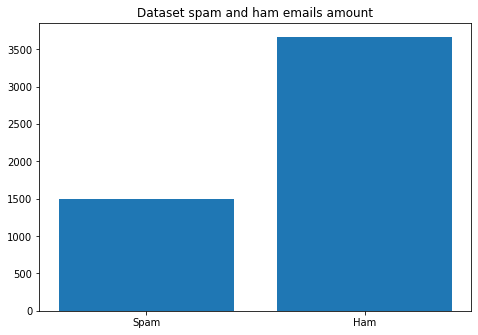

In [13]:
# Load data
data = pd.read_csv(r"spam_ham_dataset.csv")

# Split data to email and ham
spam_emails = data.loc[data['LABEL'] == 'spam']
ham_emails = data.loc[data['LABEL'] == 'ham']

print(spam_emails.head())
print(ham_emails.head())

figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
labels = ['Spam', 'Ham']
spam_ham_counts = [len(spam_emails), len(ham_emails)]
ax.set_title('Dataset spam and ham emails amount')
ax.bar(labels, spam_ham_counts)
plt.show()

In [14]:
# Create plain word clouds

spam_wordcloud = WordCloud(
        width = 1000,
        height = 1000,
        min_font_size=10
    ).generate(' '.join(spam_emails['TEXT']))

ham_wordcloud = WordCloud(
        width = 1000,
        height = 1000,
        min_font_size=10
    ).generate(' '.join(ham_emails['TEXT']))

import matplotlib.pyplot as plt

print(spam_emails)

# Process spam and ham
clean_ham_emails = clean_data(ham_emails)

clean_spam_emails = clean_data(spam_emails)

print(clean_spam_emails)

# Create processed word clouds
spam_wordcloud_with_filter = WordCloud(
        width = 1000,
        height = 1000,
        min_font_size=10,
    ).generate(' '.join(clean_spam_emails['TEXT']))

ham_wordcloud_with_filter = WordCloud(
        width = 1000,
        height = 1000,
        min_font_size=10
    ).generate(' '.join(clean_ham_emails['TEXT']))



     LABEL                                               TEXT
3     spam  Subject: photoshop , windows , office . cheap ...
7     spam  Subject: looking for medication ? we ` re the ...
10    spam  Subject: vocable % rnd - word asceticism\nvcsc...
11    spam  Subject: report 01405 !\nwffur attion brom est...
13    spam  Subject: vic . odin n ^ ow\nberne hotbox carna...
...    ...                                                ...
5159  spam  Subject: pictures\nstreamlined denizen ajar ch...
5161  spam  Subject: penny stocks are about timing\nnomad ...
5162  spam  Subject: anomaly boys from 3881\nuosda apaprov...
5164  spam  Subject: slutty milf wants to meet you\ntake t...
5170  spam  Subject: important online banking alert\ndear ...

[1499 rows x 2 columns]


/home/albert/ai/spam_classifier/utils.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails['TEXT'] = emails['TEXT'].str.replace(r'\W+', ' ', regex=True).str.replace(r'\d+', ' ', regex=True).str.lower().str.replace(r'\b\w\b', ' ', regex=True).str.replace(skip_words_regex, ' ', regex=True)


     LABEL                                               TEXT
3     spam    photoshop windows office cheap main trending...
7     spam    looking for medication we re the best source...
10    spam    vocable rnd word asceticism vcsc brand new s...
11    spam    report   wffur attion brom est inst siupied ...
13    spam    vic odin   ow berne hotbox carnal bride cutw...
...    ...                                                ...
5159  spam    pictures streamlined denizen ajar chased hea...
5161  spam    penny stocks are about timing nomad internat...
5162  spam    anomaly boys from   uosda apaproved mledms h...
5164  spam    slutty milf wants to meet you take that ilaa...
5170  spam    important online banking alert dear valued c...

[1499 rows x 2 columns]


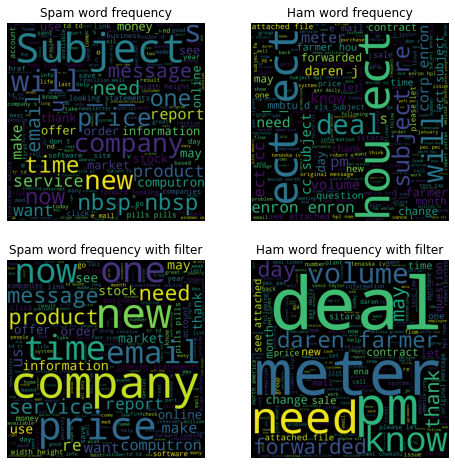

In [15]:
# Plot word cloud
figure = plt.figure(figsize=(8,8), facecolor=None)
figure.add_subplot(2, 2, 1)
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.title("Spam word frequency")
figure.add_subplot(2, 2, 2)
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.title("Ham word frequency")

figure.add_subplot(2, 2, 3)
plt.imshow(spam_wordcloud_with_filter)
plt.axis("off")
plt.title("Spam word frequency with filter")

figure.add_subplot(2, 2, 4)
plt.imshow(ham_wordcloud_with_filter)
plt.axis("off")
plt.title("Ham word frequency with filter")
plt.show()

In [16]:
# Create data sets

# Clean dataset preprocessing
data = clean_data(data)

# Create training set and test set from random sample
# Train 80%, Test 20% of random sample
data_randomized = data.sample(frac=0.5)

print("Using " + str(len(data_randomized)) + " samples from dataset")
training_test_index = round(len(data_randomized) * 0.8)

training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print("Training set " + str(len(training_set)/len(data_randomized) * 100.00) + "% of dataset")
print("Test set " + str(len(test_set)/len(data_randomized) * 100.00) + "% of dataset")

feature_set, vocabulary = transform_set(training_set)
print(f"Vocabulary length: {len(vocabulary)}")



Using 2586 samples from dataset
Training set 80.00773395204949% of dataset
Test set 19.9922660479505% of dataset
making feature set
finished feature set.
Vocabulary length: 26170


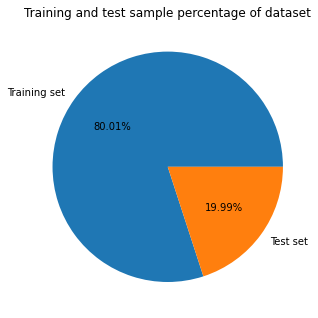

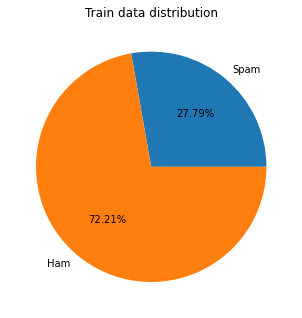

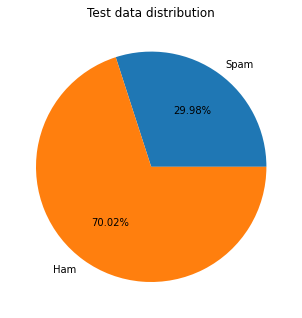

In [17]:
# Graph test and training data
figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.set_title('Training and test sample percentage of dataset')
ax.pie([len(training_set)/len(data_randomized), len(test_set)/len(data_randomized)], labels = ['Training set', 'Test set'], autopct='%1.2f%%')
plt.show()


figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.set_title('Train data distribution')
ax.pie([len(training_set.loc[data['LABEL'] == 'spam']), len(training_set.loc[data['LABEL'] == 'ham'])], labels = ['Spam', 'Ham'], autopct='%1.2f%%')
plt.show()

figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.set_title('Test data distribution')
ax.pie([len(test_set.loc[data['LABEL'] == 'spam']), len(test_set.loc[data['LABEL'] == 'ham'])], labels = ['Spam', 'Ham'], autopct='%1.2f%%')
plt.show()

In [18]:
# Train scratch naive bayes model

print("--- Training Naive Bayes model ---")
naiveBayes = NaiveBayes()
start_time = time.time()
print("Starting training...")
naiveBayes.train(feature_set, vocabulary)
naive_train_time = str(time.time() - start_time)
print("Finished training - " + naive_train_time + " seconds")


--- Training Naive Bayes model ---
Starting training...
Finished training - 13.56914758682251 seconds


Testing naive bayes accuracy...
Naive Bayes accuracy:  0.9690522243713733
[[367   8]
 [  8 134]]


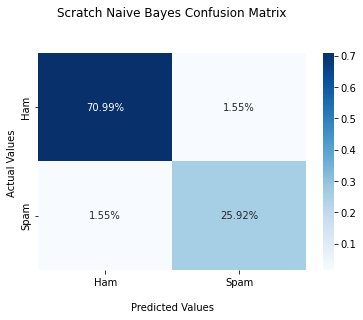

In [19]:
# Test and plot accuracy
naive_accuracy, predictions = naiveBayes.test_accuracy(test_set)
print('Naive Bayes accuracy: ', naive_accuracy)
scratch_cf_matrix = confusion_matrix(test_set['LABEL'], predictions)
print(scratch_cf_matrix)

ax = sns.heatmap(scratch_cf_matrix/np.sum(scratch_cf_matrix), annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Scratch Naive Bayes Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Ham','Spam'])
ax.yaxis.set_ticklabels(['Ham','Spam'])
plt.show()

-- Decision tree --
Starting training...
Finished training - 4.323874473571777 seconds
Transforming test set...
Transformed test set - 5.1219213008880615 seconds
Decision tree accuracy: 0.9303675048355899
[[357  18]
 [ 18 124]]


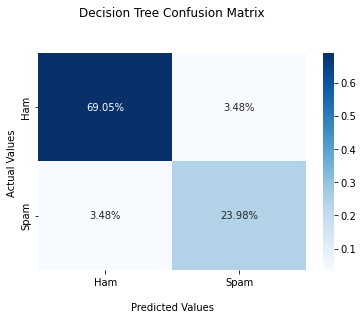

In [20]:
print("-- Decision tree --")
x_train = feature_set.iloc[:, 2:]
y_train = feature_set.iloc[:, 0]

start_time = time.time()
print("Starting training...")
tree_clf = DecisionTreeClassifier(
    criterion="entropy"
)
tree_clf.fit(x_train, y_train)
decision_train_time = str(time.time() - start_time)
print("Finished training - " + decision_train_time + " seconds")

word_counts_per_email = {unique_word: [0] * 1 for unique_word in vocabulary}

transformed_test_set = test_set
transformed_test_set['TEXT'] = transformed_test_set['TEXT'].str.split()
start_time = time.time()
print("Transforming test set...")
x_test = transform_emails_to_set(transformed_test_set['TEXT'], vocabulary)
y_test = transformed_test_set.iloc[:, 0]
print("Transformed test set - " + str(time.time() - start_time) + " seconds")

y_pred = tree_clf.predict(x_test)
decision_accuracy = str(accuracy_score(y_pred, y_test))
print("Decision tree accuracy: " + decision_accuracy)

decision_tree_cf_matrix = confusion_matrix(y_test, y_pred)
print(decision_tree_cf_matrix)

ax = sns.heatmap(decision_tree_cf_matrix/np.sum(decision_tree_cf_matrix), annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Decision Tree Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Ham','Spam'])
ax.yaxis.set_ticklabels(['Ham','Spam'])
plt.show()

-------------
-- Scikit Multinomial Naive Bayes --
Starting training...
Finished training - 0.6929869651794434 seconds
Naive bayes scikit accuracy: 0.9729206963249516
[[370   5]
 [  9 133]]


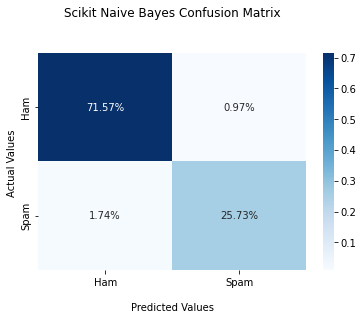

-------------


In [21]:

print("-------------")
print("-- Scikit Multinomial Naive Bayes --")
start_time = time.time()
print("Starting training...")
scikit_naive_bayes = MultinomialNB()
scikit_naive_bayes.fit(x_train, y_train)
scikit_nb_train_time = time.time() - start_time

print("Finished training - " + str(scikit_nb_train_time) + " seconds")
y_pred = scikit_naive_bayes.predict(x_test)
scikit_nb_accuracy = accuracy_score(y_pred, y_test)
print("Naive bayes scikit accuracy: " + str(scikit_nb_accuracy))

scikit_nb_cf_matrix = confusion_matrix(y_test, y_pred)
print(scikit_nb_cf_matrix)

ax = sns.heatmap(scikit_nb_cf_matrix/np.sum(scikit_nb_cf_matrix), annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Scikit Naive Bayes Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Ham','Spam'])
ax.yaxis.set_ticklabels(['Ham','Spam'])
plt.show()
print("-------------")


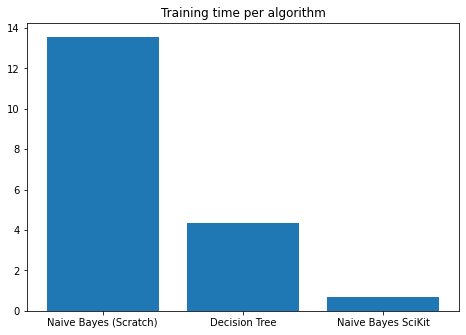

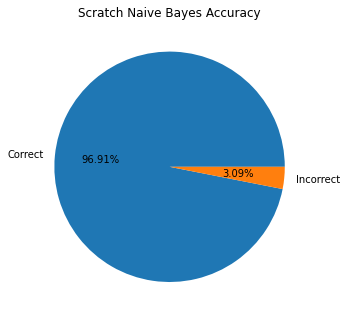

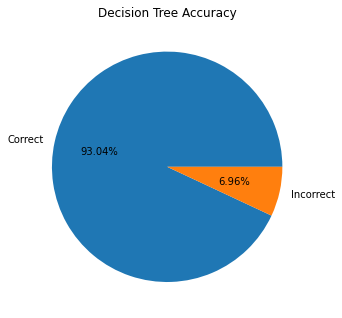

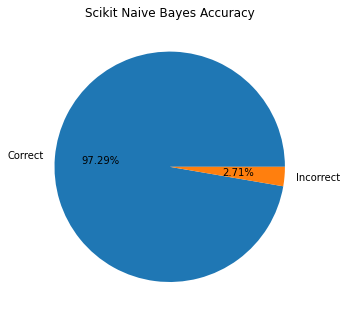

In [22]:
# Plot results
labels = ['Naive Bayes (Scratch)', 'Decision Tree', 'Naive Bayes SciKit']
times = [float(naive_train_time), float(decision_train_time), scikit_nb_train_time]

naive_accuracy = float(naive_accuracy)
naive_accuracy_incorrect = 1 - naive_accuracy

decision_accuracy = float(decision_accuracy)
decision_accuracy_incorrect = 1 - decision_accuracy

scikit_nb_accuracy_incorrect = 1 - scikit_nb_accuracy

figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.set_title('Training time per algorithm')
ax.bar(labels, times)
plt.show()

figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.set_title('Scratch Naive Bayes Accuracy')
ax.pie([naive_accuracy, naive_accuracy_incorrect], labels = ['Correct', 'Incorrect'], autopct='%1.2f%%')
plt.show()

figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.set_title('Decision Tree Accuracy')
ax.pie([decision_accuracy, decision_accuracy_incorrect], labels = ['Correct', 'Incorrect'], autopct='%1.2f%%')
plt.show()

figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.set_title('Scikit Naive Bayes Accuracy')
ax.pie([scikit_nb_accuracy, scikit_nb_accuracy_incorrect], labels = ['Correct', 'Incorrect'], autopct='%1.2f%%')
plt.show()